### Author: Linkan Majumder


#**Task** : Predict the percentage of an student based on the no. of study hours.

In this Task, we'll check out how we can use Python's Scikit-Learn library to do regression. First, we'll dive into simple linear regression, which deals with 2 variables.


> Add blockquote



In [2]:
# Importing necessary libraries for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading data from the given url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("The Dataset has been imported successfully")

data.head(10)

The Dataset has been imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#describing the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now, let's visualize our data by plotting the points on a 2-D graph. This way, we can take a closer look at our dataset and see if we can spot any patterns or relationships just by looking at it. To do this, we'll use the following script:

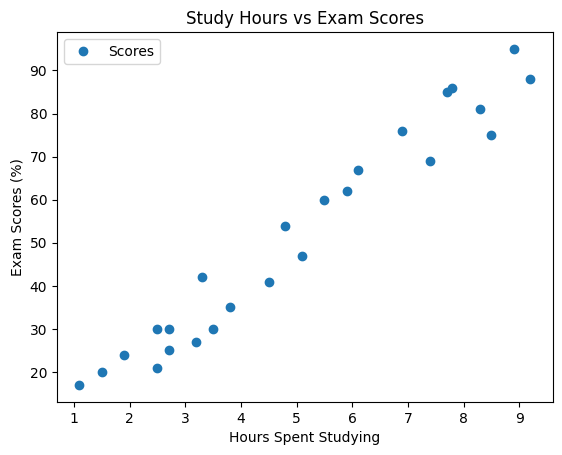

In [5]:
# Visualizing the correlation between hours studied and percentage scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Hours Spent Studying')
plt.ylabel('Exam Scores (%)')
plt.show()

The graph shows that the more hours you study, the higher your score percentage goes.

### **Data Preparing**

Next, we need to split the data into "attributes" (which are the inputs) and "labels" (which are the outputs).

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Now that we've got our characteristics and labels, the next thing is to divide this information into two parts: one for training and the other for testing. We'll do this using a handy tool called train_test_split() from Scikit-Learn.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

#**Algorithm Training**

After partitioning our data into training and testing sets, it's now time to commence training our algorithm.

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


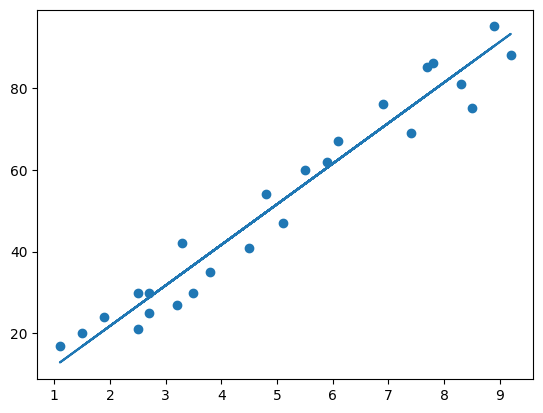

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
import pandas
y_pred = regressor.predict(X_test) # Predicting the scores
d_data= pandas.DataFrame({"Predicted Values": y_pred,"Actual Values": y_test, "Differences ": y_pred - y_test})
print(d_data)


   Predicted Values  Actual Values  Differences 
0         16.884145             20     -3.115855
1         33.732261             27      6.732261
2         75.357018             69      6.357018
3         26.794801             30     -3.205199
4         60.491033             62     -1.508967


#What will be the predicted score if the student studies 9.25 hs/day ?

In [19]:
# You can also test with your own data
hours = np.array(9.25)
my_pred = regressor.predict(hours.reshape(1, -1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


#Actual Vs Predicted

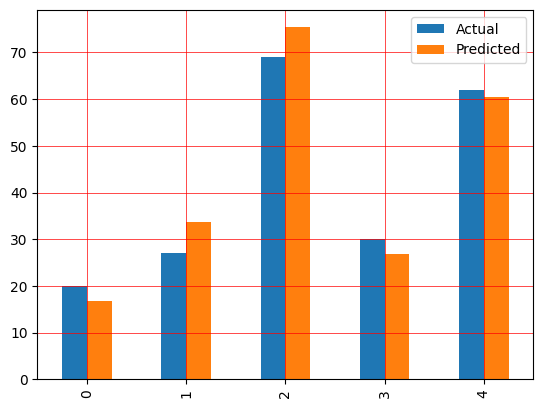

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))